In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator

In [2]:
"""
 İşleme girilecek veriler ön işlemeye alınıyor ön işlemede

 1. Verinin temizlenmesi : Boş veriler, yanlış veriler ve kayıp veriler silinir ya da doldurulur.
 2. Verinn Azaltılması : Aynı sonucu veren verilerin temizlenerek depolanan verinin azaltılması işlemi.
 3. Verinin Dönüştürülmesi : Verilerin işleme alabilmek için çevrimler dizi şekillendirmesi verilerin ölçütlenmesi gibi işlemleri içerir.
 4. Veri Birleştirilmesi : Birden fazla veri yığını olduğu zamanlarda bunların birleştirilmesinde kullanılır.
 
"""
def preprocess(array):
    """
      dizi uygun formata çevriliyor ve veri ölçekleniyor.
    """
    array = array.astype("float32")
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

In [3]:
def normalize(array):
  array = array.astype("float32") / 255.0
  return array

In [4]:
def noise(array):
    """
      Verilen dizideki elemanlara rastgele gürültü ekleniyor.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

In [27]:
def display(array1, array2):
    """
     Parametre olarak girilen her diziden rastgele 10 resim gösterir.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(32, 32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(32, 32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [6]:
def random_flip(x_train,y_train):
    """
      ImageDataGenerator kullanılarak resimler rastgele olarak döndürülüyor.
    """
    datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
    # Veri seti uygun formata getiriliyor.
    x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

    # Veriye belirlenen döndürme işlemleri rastgele olarak uygulanılıyor.
    datagen.fit(x_train)
    flow = datagen.flow(x_train, y_train, batch_size=9)
    
    return flow


In [7]:
def datagen_to_array(datagen):
    """
      Verilen NumpyIterator iki ayrı diziye dönüştürülüyor.
    """
    datagen.reset()
    x=np.concatenate([datagen.next()[0] for i in range(datagen.__len__())])
    y=np.concatenate([datagen.next()[1] for i in range(datagen.__len__())])
    return x,y

In [8]:
def data_aug(train_data,test_data,result_train_data,result_test_data):
  try:
    # Aynı veri büyütülüyor.
    flow = random_flip(train_data,result_train_data)
    flow_test = random_flip(test_data,result_test_data)
    # Büyütüken veri diziye aktarılıyor..
    x,y = datagen_to_array(flow)
    z,t = datagen_to_array(flow_test)
    # Veri ön işlemeye alınıyor..
    train_data = np.reshape(train_data, (len(train_data), 28, 28, 1))
    test_data = np.reshape(test_data, (len(test_data), 28, 28, 1))
    # Mevcut veriye değişim yapılan veri ekleniyor.
    train_data = np.concatenate((train_data,x))
    train_data = preprocess(train_data)
    test_data = np.concatenate((test_data,z))
    test_data = preprocess(test_data)
    result_train_data = np.concatenate((result_train_data,y))
    result_test_data = np.concatenate((result_test_data,t))
    # Veri normalize ediliyor.
    train_data = normalize(train_data)
    test_data = normalize(test_data)
    return train_data,test_data,result_train_data,result_test_data
  except:
    return train_data,test_data,result_train_data,result_test_data


In [9]:
def resnet_preprocess(train_data,test_data,result_train_data,result_test_data):
  a =tf.image.resize(train_data, [32,32])
  a = np.repeat(a, 3, axis=-1)
  b =tf.image.resize(test_data, [32,32])
  b = np.repeat(b, 3, axis=-1)
  # One-Hot coding 
  result_train_data = tf.keras.utils.to_categorical(result_train_data , num_classes=10)
  result_test_data = tf.keras.utils.to_categorical(result_test_data , num_classes=10)
  return a,b,result_train_data,result_test_data

In [10]:
# Data set yükleniyor.
(train_data, result_train_data), (test_data, result_test_data) = mnist.load_data()

In [11]:
# Büyütükmüş veri alınıyor.
augmentation_data,augmentation_test_data,result_train_data,result_test_data = data_aug(train_data,test_data, result_train_data,result_test_data)

In [12]:
print(augmentation_data.shape)
print(augmentation_test_data.shape)
print(result_train_data.shape)
print(result_test_data.shape)

(120000, 28, 28, 1)
(20000, 28, 28, 1)
(120000,)
(20000,)


In [ ]:
# Veriye gürültü ekleniyor.
noisy_train_data = noise(augmentation_data)
noisy_test_data = noise(augmentation_test_data)

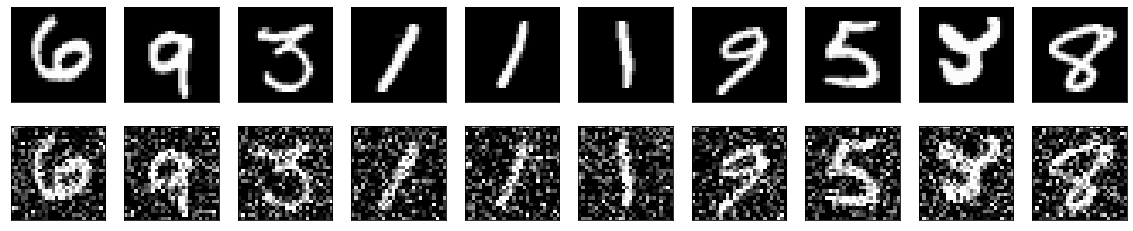

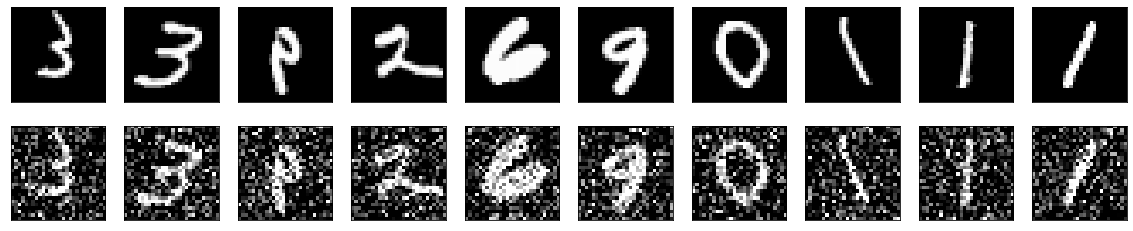

In [ ]:
# Modele girmeye hazır verilen gösteriliyor.
display(augmentation_data, noisy_train_data)
display(augmentation_test_data, noisy_test_data)

In [13]:
resnet_train_data,resnet_test_data,result_resnet_train,result_resnet_test = resnet_preprocess(augmentation_data,augmentation_test_data,result_train_data,result_test_data)
print(resnet_train_data.shape)
print(resnet_test_data.shape)
print(result_resnet_train.shape)
print(result_resnet_test.shape)

(120000, 32, 32, 3)
(20000, 32, 32, 3)
(120000, 10)
(20000, 10)


In [15]:
input = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 16, 16, 32)       9248

In [18]:
autoencoder.fit(
    x=resnet_train_data,
    y=resnet_train_data,
    epochs=3,
    batch_size=128,
    shuffle=True,
    validation_data=(resnet_test_data, resnet_test_data),
)

Epoch 1/3
938/938 [==============================] - 439s 468ms/step - loss: 0.1104 - val_loss: 0.0996
Epoch 2/3
938/938 [==============================] - 455s 485ms/step - loss: 0.0995 - val_loss: 0.0983
Epoch 3/3
938/938 [==============================] - 443s 472ms/step - loss: 0.0985 - val_loss: 0.0978


In [19]:
# Model Dosyaya kaydetiliyor.
!mkdir -p saved_model
autoencoder.save('saved_model/autoencoder') 

INFO:tensorflow:Assets written to: saved_model/autoencoder/assets


In [20]:
# Kaydedilmiş model çalıştırılıyor.
loaded_model =  tf.keras.models.load_model('saved_model/autoencoder')
loaded_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 16, 16, 32)       9248

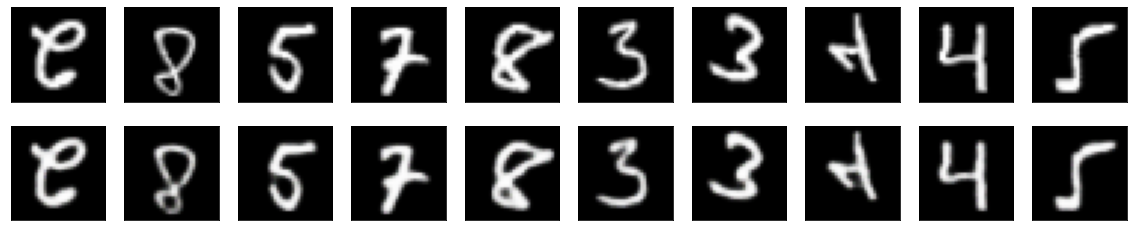

In [28]:
# Test datası tahminlerle yazdırılıyor.
predictions = loaded_model.predict(resnet_test_data)
display(resnet_test_data, predictions)

In [ ]:
# Resnet modeli için ön işleme fonksiyonu çalıştırılıyor
resnet_train_data,resnet_test_data,result_resnet_train,result_resnet_test = resnet_preprocess(augmentation_data,augmentation_test_data,result_train_data,result_test_data)

(120000, 32, 32, 3)
(20000, 32, 32, 3)
(120000, 10)
(20000, 10)


In [24]:
# Önceden hazılanmış modele resnet ile transfer learning uygulanıyor.
resnet_model = Sequential()

for layer in loaded_model.layers:
  layer.trainable=False

resnet_model.add(loaded_model)

resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(512, activation='relu'))
resnet_model.add(layers.Dense(10, activation = 'softmax'))

resnet_model.layers[0].trainable = False

resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 32, 32, 3)         29507     
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,608,013
Trainable params: 1,578,506
Non-trainable params: 29,507
_________________________________________________________________


In [25]:
resnet_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=tf.keras.metrics.CategoricalAccuracy())

In [26]:
resnet_model.fit(x=resnet_train_data,y=result_resnet_train,epochs=10,validation_data=(resnet_test_data, result_resnet_test))

Epoch 1/10
3750/3750 [==============================] - ETA: 0s - loss: 1.6027 - categorical_accuracy: 0.5114

KeyboardInterrupt: ignored